In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import scipy.stats as sps

In [2]:
#specifying the maximum power of 2
power = 10
#the rolling sample length
n = 2**power
ticker = 'BTC-USD' 
start = '2015-01-01'
end = '2022-05-24'
#downloading data
data = yf.download(ticker, start, end)
raw_data = data['Close']
prices = np.array(raw_data)[1:]
returns = np.array(raw_data)[1:]/np.array(raw_data)[:-1] - 1
#initialising arrays
hursts = np.array([])
tstats = np.array([])
pvalues = np.array([])
#calculating the rolling Hurst exponent
for t in np.arange(n,len(returns)+1):
    #specifying the subsample
    data = returns[t-n:t]
    X = np.arange(2, power+1)
    Y = np.array([])
    for p in X:
        m = 2**p
        s = 2**(power-p)
        rs_array = np.array([])
        #moving across subsamples
        for i in np.arange(0,s):
            subsample = data[i*m:(i+1)*m]
            mean = np.average(subsample)
            deviate = np.cumsum(subsample-mean)
            difference = max(deviate) - min(deviate)
            stdev = np.std(subsample)
            rescaled_range = difference/stdev
            rs_array = np.append(rs_array, rescaled_range)
        #calculating the log2 of average rescaled range
        Y = np.append(Y, np.log2(np.average(rs_array)))
    reg = sm.OLS(Y, sm.add_constant(X))
    res = reg.fit()
    hurst = res.params[1]
    tstat = (res.params[1]-0.5)/res.bse[1]
    pvalue = 2*(1 - sps.t.cdf(abs(tstat),res.df_resid))
    hursts = np.append(hursts, hurst)
    tstats = np.append(tstats, tstat)
    pvalues = np.append(pvalues, pvalue)
    


[*********************100%***********************]  1 of 1 completed


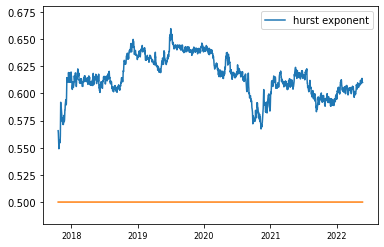

In [3]:
#visualising the Hurst exponent
plt.figure(1)
plt.rc('xtick',labelsize = 8)
plt.ylim(0.48,0.68)
plt.plot(raw_data.index[n:],hursts)
plt.plot(raw_data.index[n:],np.ones(len(hursts))*0.5)
plt.legend(['hurst exponent'])
plt.show()
#visualising the t-stat and critical values
# plt.figure(2)
# plt.rc('xtick',labelsize = 8)
# plt.plot(raw_data.index[n:],tstats)
# plt.plot(raw_data.index[n:],np.ones(len(tstats))*sps.t.ppf(0.005,res.df_resid))
# plt.plot(raw_data.index[n:],np.ones(len(tstats))*sps.t.ppf(0.995,res.df_resid))
# plt.legend()
# plt.show()

In [6]:
hursts[-100]

0.606011887104873

In [8]:
data

array([ 0.01371851,  0.07615813, -0.02773962, ...,  0.00792741,
        0.03028979, -0.04039123])

In [6]:
start


'2018-01-01'

In [7]:
plotly?


Object `plotly` not found.


In [8]:
import plotly.graph_objects as go 
from datetime import datetime
data = pd.DataFrame(data)

In [9]:
data

,0
0,0.013719
1,0.076158
2,-0.027740
3,0.040407
4,0.002046
...,...
1019,0.055503
1020,-0.036735
1021,0.007927
1022,0.030290


In [9]:
dt = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [10]:
dt.head(100)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
...,...,...,...,...,...,...
2018-04-05,6848.649902,6933.819824,6644.799805,6811.470215,6811.470215,5639320064
2018-04-06,6815.959961,6857.490234,6575.000000,6636.319824,6636.319824,3766810112
2018-04-07,6630.509766,7050.540039,6630.509766,6911.089844,6911.089844,3976610048


In [20]:
a = np.array(dt['Close'].tail(100))

In [21]:
a

array([42197.515625  , 42586.91796875, 44575.203125  , 43961.859375  ,
       40538.01171875, 40030.9765625 , 40122.15625   , 38431.37890625,
       37075.28125   , 38286.02734375, 37296.5703125 , 38332.609375  ,
       39214.21875   , 39105.1484375 , 37709.78515625, 43193.234375  ,
       44354.63671875, 43924.1171875 , 42451.7890625 , 39137.60546875,
       39400.5859375 , 38419.984375  , 38062.0390625 , 38737.26953125,
       41982.92578125, 39437.4609375 , 38794.97265625, 38904.01171875,
       37849.6640625 , 39666.75390625, 39338.78515625, 41143.9296875 ,
       40951.37890625, 41801.15625   , 42190.65234375, 41247.82421875,
       41077.99609375, 42358.80859375, 42892.95703125, 43960.93359375,
       44348.73046875, 44500.828125  , 46820.4921875 , 47128.00390625,
       47465.73046875, 47062.6640625 , 45538.67578125, 46281.64453125,
       45868.94921875, 46453.56640625, 46622.67578125, 45555.9921875 ,
       43206.73828125, 43503.84765625, 42287.6640625 , 42782.13671875,
      

In [18]:
dt['Hurst'], _, _ =  compute_Hc(dt['Close'].tail(100), kind='price', simplified=True)

In [22]:
dt

,Open,High,Low,Close,Adj Close,Volume,Hurst
Date,,,,,,,
2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520,0.564366
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,0.564366
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,0.564366
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,0.564366
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,0.564366
...,...,...,...,...,...,...,...
2022-05-19,28720.359375,30430.751953,28708.955078,30314.333984,30314.333984,33773447707,0.564366
2022-05-20,30311.119141,30664.976562,28793.605469,29200.740234,29200.740234,30749382605,0.564366
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226562,29432.226562,17274840442,0.564366


In [ ]:
dt

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=dt['Date'],
                open=dt['Open'],
                high=dt['High'],
                low=dt['Low'],
                close=dt['Close'])])

In [ ]:
fig.show()

In [14]:
# !pip install hurst
from hurst import compute_Hc, random_walk

In [15]:
H, c, data = compute_Hc(dt['Close'], kind='price', simplified=True)

In [18]:
H

0.8663054075503793

In [19]:
c

0.49795665754581986

In [20]:
data

[[10, 17, 31, 56, 100, 177, 316, 562, 1000, 1605],
 [4.22102321879837,
  6.032449912018119,
  9.706196445179314,
  15.239594418260449,
  25.413264612314496,
  38.60587853265551,
  64.96903446156072,
  151.4076373261608,
  111.94695438358298,
  506.4926830067206]]

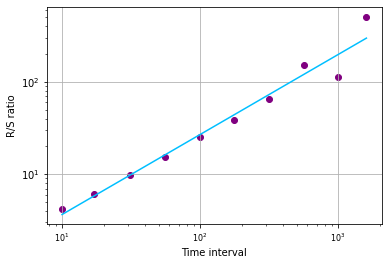

H=0.8663, c=0.4980


In [21]:
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))